In [1]:
## how to install these programs on Mac
# brew install node
# npm install -g phantomjs-prebuilt

import random
from IPython.display import Image
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

window_resolutions = [
    (1024, 768),
    (1280, 800),
    (1366, 768),
    (1440, 900)
]

driver = webdriver.PhantomJS('node_modules/phantomjs-prebuilt/lib/phantom/bin/phantomjs')
driver.set_window_size(*random.choice(window_resolutions))

url = 'https://hcahealthcare.com/locations/?state=TN'
driver.get(url)
delay = 3 # seconds
try:
    myElem = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.XPATH, '//*[@id="location1"]')))
    print( "Page is ready!")
except TimeoutException:
    print( "Loading took too much time!")

output_screenshot = 'screenshot.png'

Page is ready!


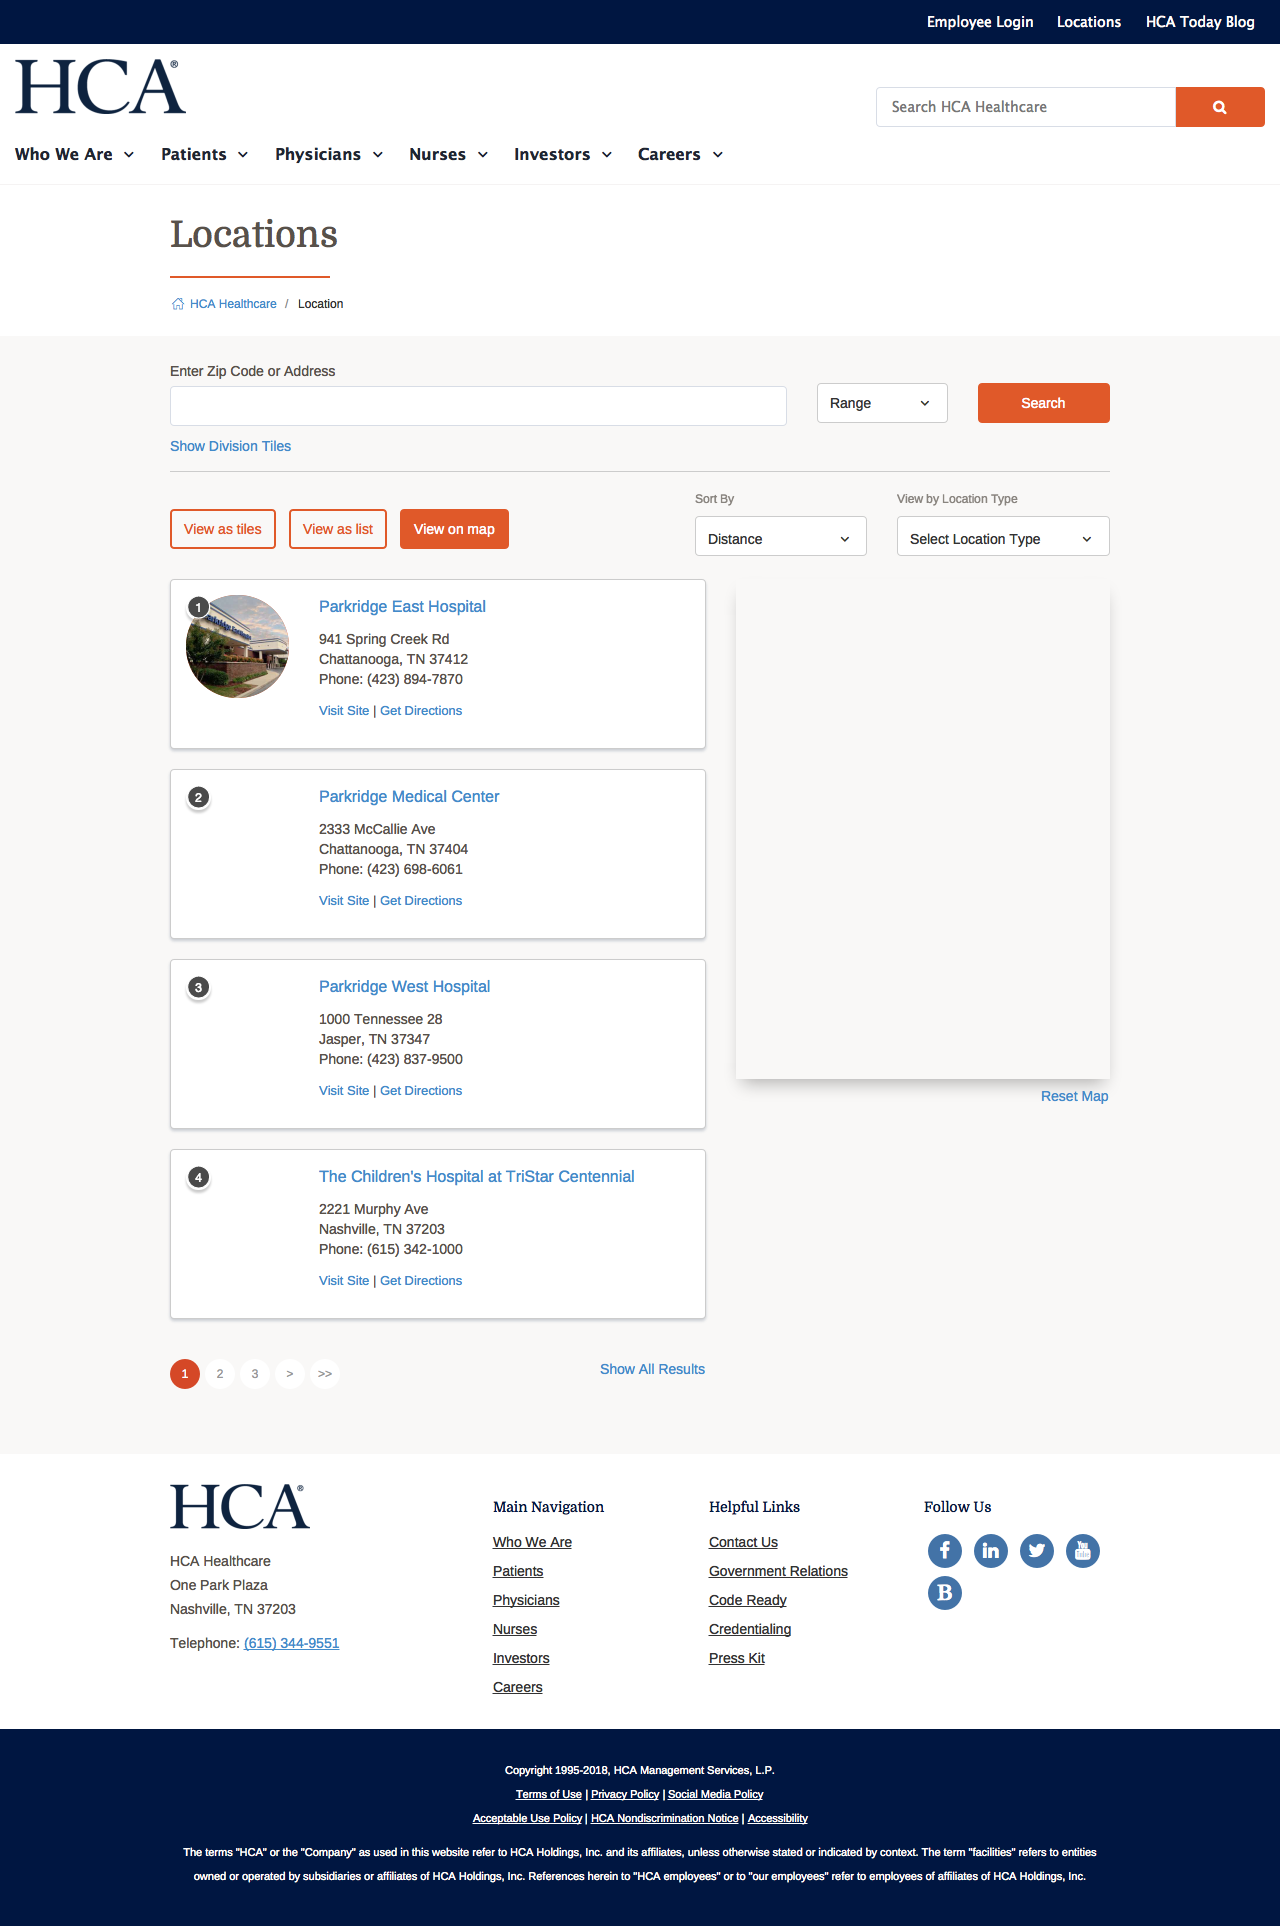

In [2]:
driver.save_screenshot(output_screenshot)
Image(output_screenshot)

In [3]:
# Find Pagination area
pagination = driver.find_element(By.XPATH, './/div[@id="pagination"]')
print(pagination.get_attribute('innerHTML'))


						<ul class="pagination circle"><li class="active"><a onclick="return false;"><span>1</span></a></li><li><a onclick="ehcChangePage(2);return false;"><span>2</span></a></li><li><a onclick="ehcChangePage(3);return false;"><span>3</span></a></li><li><a onclick="ehcChangePage(2);return false;"><span>&gt;</span></a></li><li><a onclick="ehcChangePage(4);return false;"><span>&gt;&gt;</span></a></li></ul>
					


In [4]:
%%html
<div id="pagination" class="clear">
    <ul class="pagination circle">
        <li class="active">
            <a onclick="return false;"><span>1</span></a>
        </li>
        <li>
            <a onclick="ehcChangePage(2);return false;"><span>2</span></a>
        </li>
        <li>
            <a onclick="ehcChangePage(3);return false;"><span>3</span></a>
        </li>
        <li>
            <a onclick="ehcChangePage(2);return false;"><span>&gt;</span></a>
        </li>
        <li>
            <a onclick="ehcChangePage(4);return false;"><span>&gt;&gt;</span></a>
        </li>
    </ul>
</div>

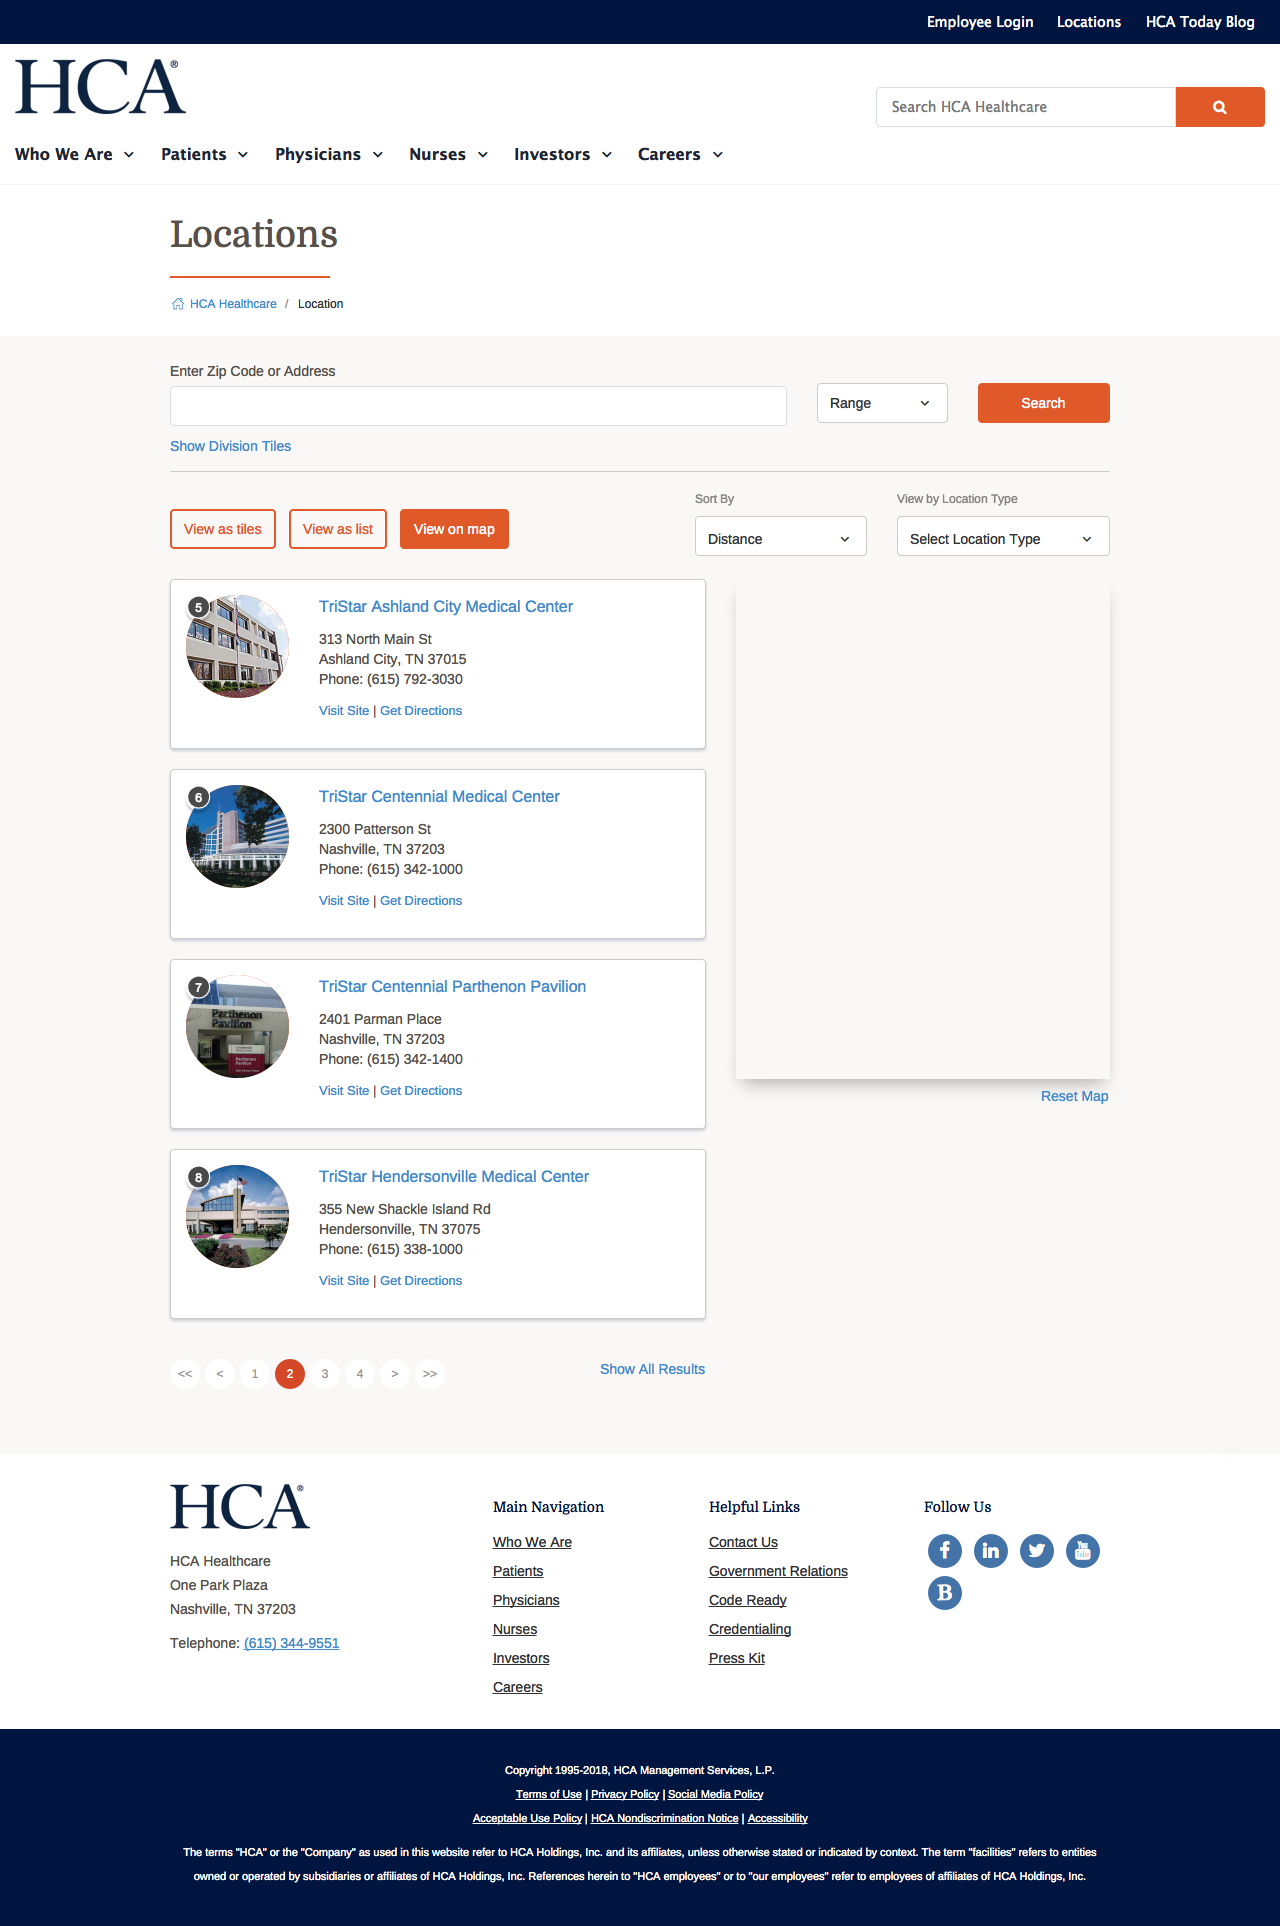

In [5]:
# cool now click the 'next' button
next_button = driver.find_element(By.XPATH, './/div[@id="pagination"]/ul/li[last()-1]/a')
next_button.click()
driver.save_screenshot(output_screenshot)
Image(output_screenshot)

In [6]:
# grab some facilities
# XPATH doesn't like regular expressions. There are hacky ways around it, try not to waste time on it.
facilities = driver.find_elements(By.XPATH, './/div[@id="locations-map-view"]//div[@style="display: block;"]')
facilities

[<selenium.webdriver.remote.webelement.WebElement (session="3fbf3f90-0dda-11e8-85a0-2bee79945bc0", element=":wdc:1518209169671")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3fbf3f90-0dda-11e8-85a0-2bee79945bc0", element=":wdc:1518209169674")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3fbf3f90-0dda-11e8-85a0-2bee79945bc0", element=":wdc:1518209169675")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3fbf3f90-0dda-11e8-85a0-2bee79945bc0", element=":wdc:1518209169676")>]

In [18]:
facility_html = facilities[0].get_attribute('innerHTML')

In [8]:
%%html
<div class="card">
   <div class="row">
      <div class="col-sm-3">
         <img class="building-number pull-left  hidden-xs" src="//core.secure.ehc.com/src/apps/maps-and-locations/images/pins/flat/4a4a4a/circle/5.png" data-color="4a4a4a">
         <img class="building-icon map-small-image circle img-loaded" data-img-src="//hcahealthcare.com/util/images/location-images/tristar-ashland-city.jpg" alt="" src="//hcahealthcare.com/util/images/location-images/tristar-ashland-city.jpg">
      </div>
      <div class="col-sm-9">
         <div class="map-sidebar-info-block">
            <p class="location-title">
               <a href="http://tristarashlandcity.com/" data-open="popup" itemprop="name">TriStar Ashland City Medical Center</a>
               <br>
               <span class="location-distance"> </span>
            </p>
            <address itemprop="address" itemscope="" itemtype="https://schema.org/PostalAddress" data-address="313 North Main St, Ashland City, TN 37015" data-id="ad8652b8-33f3-412e-93d4-7fcf036cd2cc">
               <span itemprop="streetAddress">313 North Main St</span><br><span itemprop="addressLocality">Ashland City</span>,&nbsp;<span itemprop="addressRegion">TN</span>&nbsp;<span itemprop="addressRegion">37015</span><br><span class="hidden-xs" itemprop="telephone">Phone: (615) 792-3030</span> 
            </address>
            <meta itemprop="geo" content="36.277225,-87.065431">
            <p class="listing-wait-distance">
            </p>
            <p class="links hidden-xs">
               <a href="http://tristarashlandcity.com/" class="location-page" target="_blank" rel="noopener noreferrer">Visit Site</a> |
               <a href="/locations/?directions=TriStar Ashland City Medical Center" onclick="get_directions_to('location5'); return false;" "="" class="directions">Get Directions</a>
            </p>
            <div class="links visible-xs">
               <div class="row">
                  <div class="col-xs-6">
                     <a class="btn btn-outline-primary btn-block" href="http://tristarashlandcity.com/" target="_blank" rel="noopener noreferrer">Visit Site</a>
                  </div>
                  <div class="col-xs-6">
                     <a class="btn btn-outline-primary btn-block" href="tel:6157923030">Call Now</a>
                  </div>
                  <div class="col-xs-12">
                     <a href="/locations/?directions=TriStar Ashland City Medical Center" onclick="get_directions_to('location5'); return false;" "="" class="directions btn btn-primary btn-block">Get Directions</a>
                  </div>
               </div>
            </div>
         </div>
      </div>
   </div>
</div>

In [9]:
# It might not be consistent, but we've already written it
import re
from bs4 import BeautifulSoup

def extract_title(soupy_html_address):
    title = soupy_html_address.find(class_='location-title')
    link = title.find('a')
    
    name = link.text
    url = link.get('href')

    return {
        'facility': name,
        'url': url
    }

def extract_address(soupy_html_address):
    street_address = soupy_html_address.find('span', attrs={'itemprop': 'streetAddress'}).text
    city = soupy_html_address.find('span', attrs={'itemprop': 'addressLocality'}).text
    
    regions = soupy_html_address.find_all('span', attrs={'itemprop': 'addressRegion'})
    for item in regions:
        if item.text.isdigit():
            zip_code = item.text
        else:
            state_code = item.text

    phone_pattern = re.compile('(\d{3})\D*(\d{3})\D*(\d{4})')
    phone_field = soupy_html_address.find('span', attrs={'itemprop': 'telephone'}).text

    matches = re.search(phone_pattern, phone_field)
    phone_number = ''.join(matches.groups())
    
    return {
        'address': street_address,
        'city': city,
        'state_code': state_code,
        'zip_code': zip_code,
        'phone': phone_number
    }

In [10]:
def process_facility(facility):
    # Webdriver isn't using BeautifulSoup, but lets leverage it anyway
    soup = BeautifulSoup(facility.get_attribute('innerHTML'), 'lxml')
    data = dict()
    data.update(extract_address(soup))
    data.update(extract_title(soup))
    return data

In [11]:
# Extract page's displayed information

facility_data = []
for location in facilities:
    data = process_facility(location)
    facility_data.append(data)
facility_data

[{'address': '941 Spring Creek Rd',
  'city': 'Chattanooga',
  'facility': 'Parkridge East Hospital',
  'phone': '4238947870',
  'state_code': 'TN',
  'url': 'http://parkridgeeasthospital.com/',
  'zip_code': '37412'},
 {'address': '2333 McCallie Ave',
  'city': 'Chattanooga',
  'facility': 'Parkridge Medical Center',
  'phone': '4236986061',
  'state_code': 'TN',
  'url': 'http://parkridgemedicalcenter.com/',
  'zip_code': '37404'},
 {'address': '1000 Tennessee 28',
  'city': 'Jasper',
  'facility': 'Parkridge West Hospital',
  'phone': '4238379500',
  'state_code': 'TN',
  'url': 'http://parkridgewesthospital.com/',
  'zip_code': '37347'},
 {'address': '2221 Murphy Ave',
  'city': 'Nashville',
  'facility': "The Children's Hospital at TriStar Centennial",
  'phone': '6153421000',
  'state_code': 'TN',
  'url': 'http://thechildrenshospitalnashville.com/',
  'zip_code': '37203'}]

## Bringing it all together

In [12]:
import random
from IPython.display import Image
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException, NoSuchElementException

window_resolutions = [
    (1024, 768),
    (1280, 800),
    (1366, 768),
    (1440, 900)
]

driver = webdriver.PhantomJS('node_modules/phantomjs-prebuilt/lib/phantom/bin/phantomjs')
driver.set_window_size(*random.choice(window_resolutions))

url = "https://hcahealthcare.com/locations/?state=TN"
driver.get(url)
delay = 3 # seconds
try:
    myElem = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.XPATH, '//*[@id="location1"]')))
    print( "Page is ready!")
except TimeoutException:
    print( "Loading took too much time!")

output_screenshot = 'screenshot.png'

Page is ready!


No next page element left


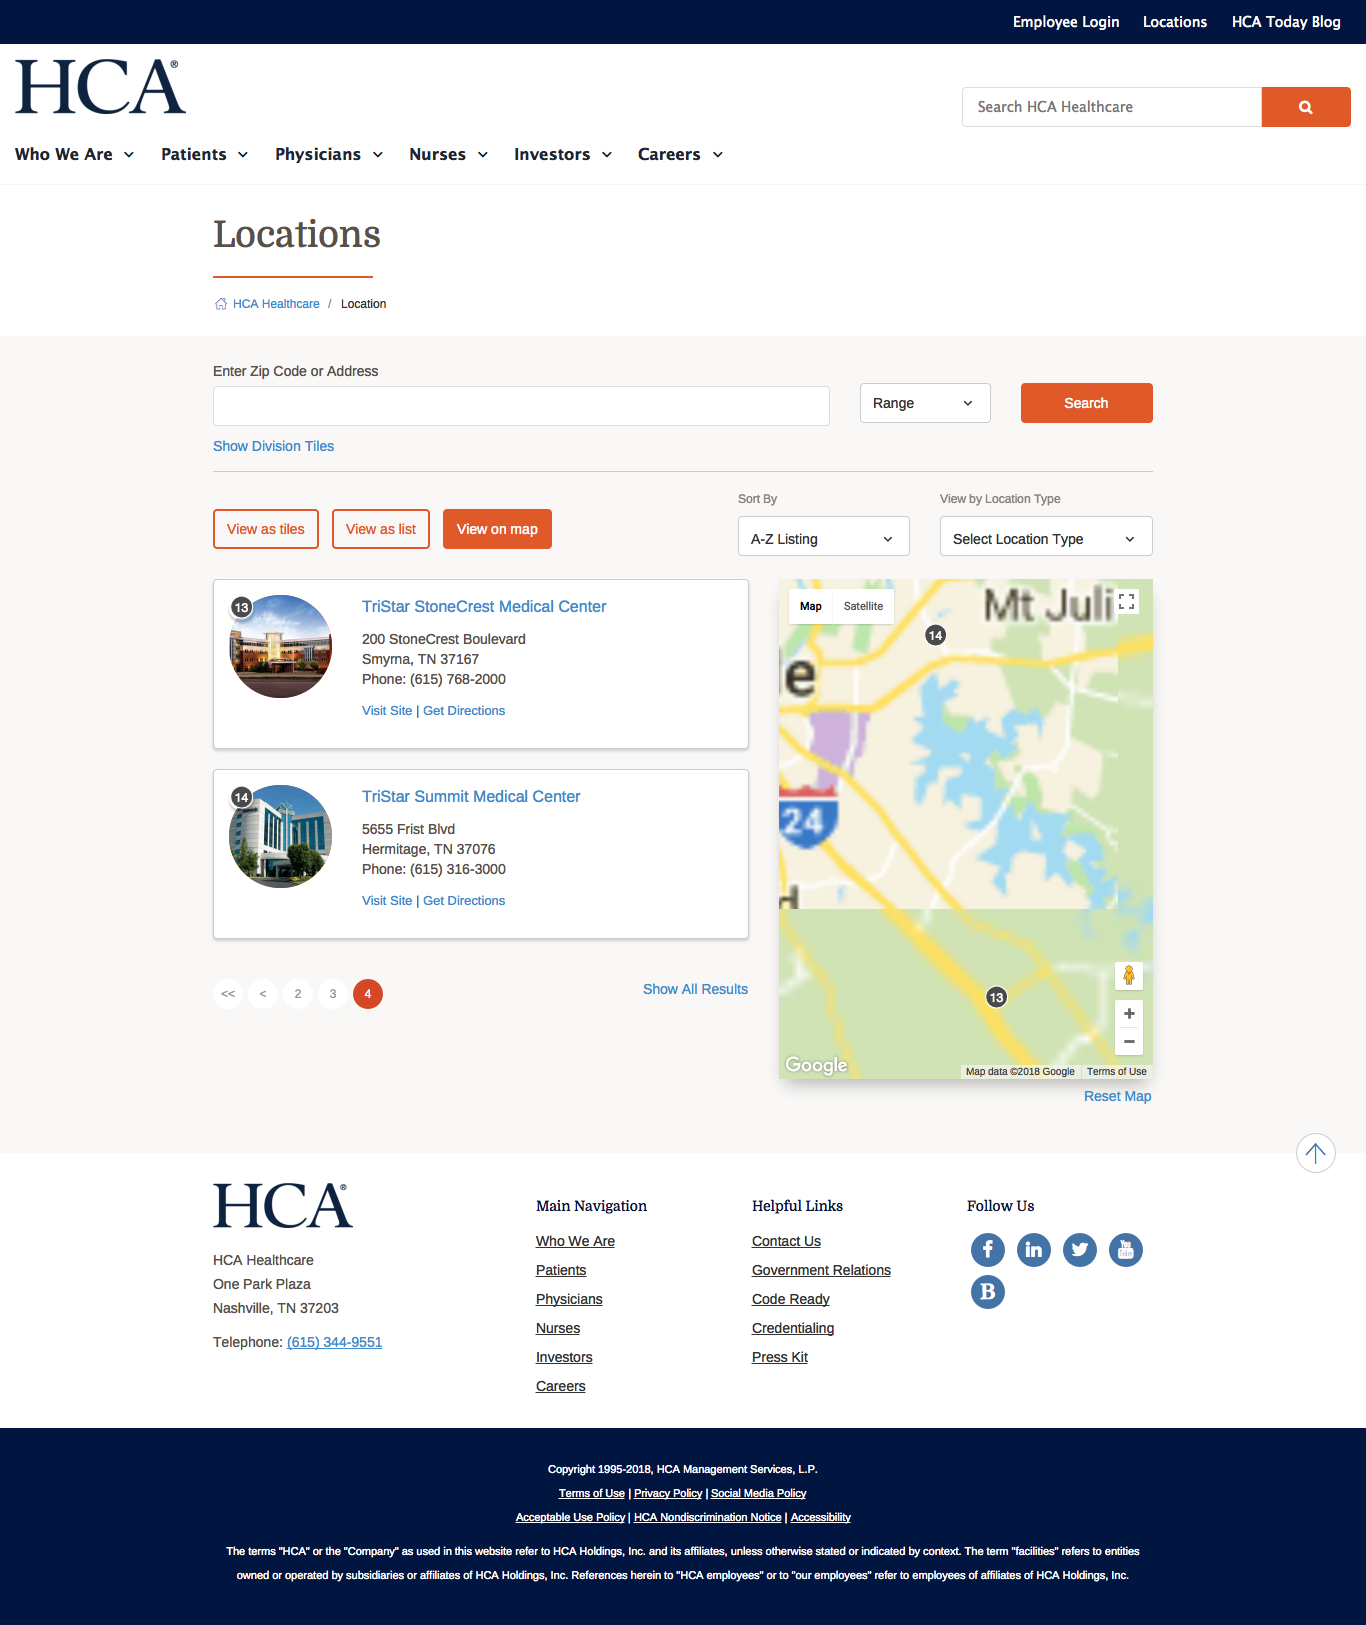

In [13]:
facility_data = []

while True:
    # grab visible facilities
    facilities = driver.find_elements(By.XPATH, './/div[@id="locations-map-view"]//div[@style="display: block;"]')
    # leverage our work in BeautifulSoup to make a list of facility information
    for location in facilities:
        data = process_facility(location)
        facility_data.append(data)

    # click to the next page, if availible
    next_button = driver.find_element(By.XPATH, './/div[@id="pagination"]//ul/li[last()-1]/a')
    if next_button.get_attribute('innerHTML') == '<span>&gt;</span>':
        next_button.click()
    else:
        print('No next page element left')
        break
    
driver.save_screenshot(output_screenshot)
Image(output_screenshot)

In [17]:
len(facility_data)

14

In [15]:
list(map(lambda x: x['facility'], facility_data))

['Parkridge East Hospital',
 'Parkridge Medical Center',
 'Parkridge West Hospital',
 "The Children's Hospital at TriStar Centennial",
 'TriStar Ashland City Medical Center',
 'TriStar Centennial Medical Center',
 'TriStar Centennial Parthenon Pavilion',
 'TriStar Hendersonville Medical Center',
 'TriStar Horizon Medical Center',
 'TriStar Skyline Madison Campus',
 'TriStar Skyline Medical Center',
 'TriStar Southern Hills Medical Center',
 'TriStar StoneCrest Medical Center',
 'TriStar Summit Medical Center']

In [16]:
facility_data[-1]

{'address': '5655 Frist Blvd',
 'city': 'Hermitage',
 'facility': 'TriStar Summit Medical Center',
 'phone': '6153163000',
 'state_code': 'TN',
 'url': 'http://tristarsummit.com/',
 'zip_code': '37076'}